In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import numpy as np

dict_keys(['lamb0.1', 'lamb0.5', 'lamb1.0', 'lamb2.0', 'lamb5.0'])
[549.0879505960344, 1946.976582560326, 3130.6355038235974, 4697.873475983613, 7186.865462282816]
[448.54159041327074, 1701.0855650101028, 2826.7478595401476, 4386.969353995526, 6986.003829724284]
[862.2995274653201, 3299.9845567347816, 5452.579856972732, 8369.365643684805, 13072.247825140075]


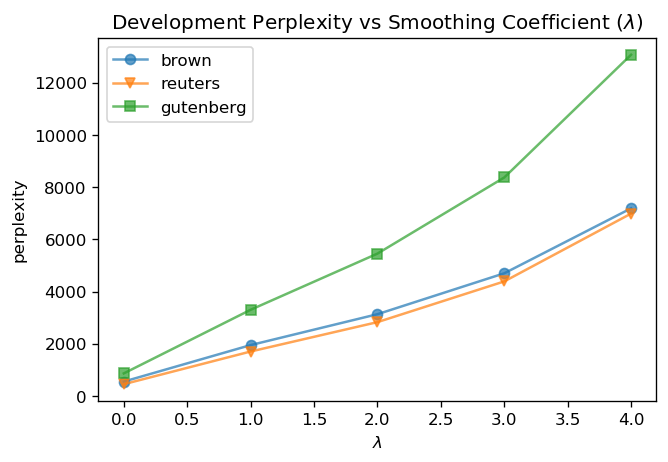

In [40]:
with open('lambda_results.pkl', 'rb') as f:
    results = pickle.load(f)

print(results.keys())

domain_list = ['brown', 'reuters', 'gutenberg']
marker_list = ['o', 'v', 's']

fig, ax = plt.subplots(1,1, dpi=120)

key_list = ['lamb0.1', 'lamb0.5', 'lamb1.0', 'lamb2.0', 'lamb5.0']
# three in-domain results: brown, reuters, gutenberg
for idx in range(3):
    r = []
    for key in key_list:
        r.append(results[key]['train'][idx, idx])
    ax.plot(r, linestyle='-', marker=marker_list[idx], label=domain_list[idx], alpha=0.7)
    print(r)

ax.set_title("Development Perplexity vs Smoothing Coefficient ($\lambda$)")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("perplexity")
plt.legend()
plt.show()
fig.savefig('labmda.png')

dict_keys(['gamma2', 'gamma5', 'gamma10', 'gamma15', 'gamma20'])
[27598.887563643097, 13331.130598610362, 7108.280979359445, 4585.9489275728765, 3130.6355038235974]
[17266.926308872567, 8925.510042607071, 5501.173321989327, 3814.8692776258367, 2826.7478595401476]
[30267.230288075072, 16411.531533965473, 9839.342132095037, 7062.120849064598, 5452.579856972732]


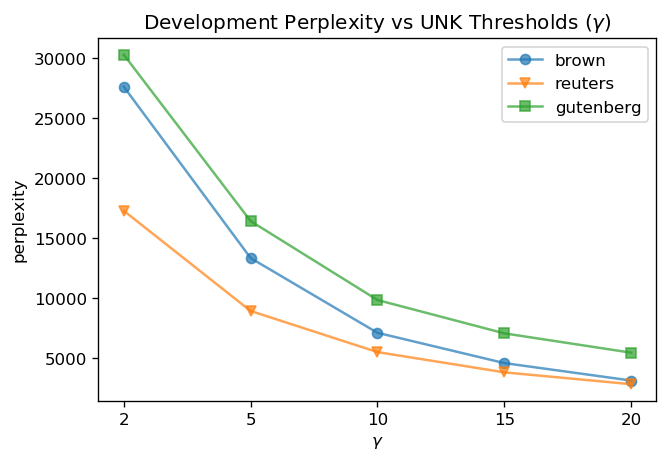

In [49]:
with open('results.pkl', 'rb') as f:
    results = pickle.load(f)
    
print(results.keys())

domain_list = ['brown', 'reuters', 'gutenberg']
marker_list = ['o', 'v', 's']

fig, ax = plt.subplots(1,1, dpi=120)

key_list = ['gamma2', 'gamma5', 'gamma10', 'gamma15', 'gamma20']
# three in-domain results: brown, reuters, gutenberg
for idx in range(3):
    r = []
    for key in key_list:
        r.append(results[key]['train'][idx, idx])
    ax.plot(r, linestyle='-', marker=marker_list[idx], label=domain_list[idx], alpha=0.7)
    print(r)

ax.set_title("Development Perplexity vs UNK Thresholds ($\gamma$)")
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels([2, 5, 10, 15, 20])
ax.set_xlabel("$\gamma$")
ax.set_ylabel("perplexity")
plt.legend()
plt.show()
fig.savefig('gamma.png')

dict_keys(['brown', 'reuters', 'gutenberg'])
brown
reuters
gutenberg


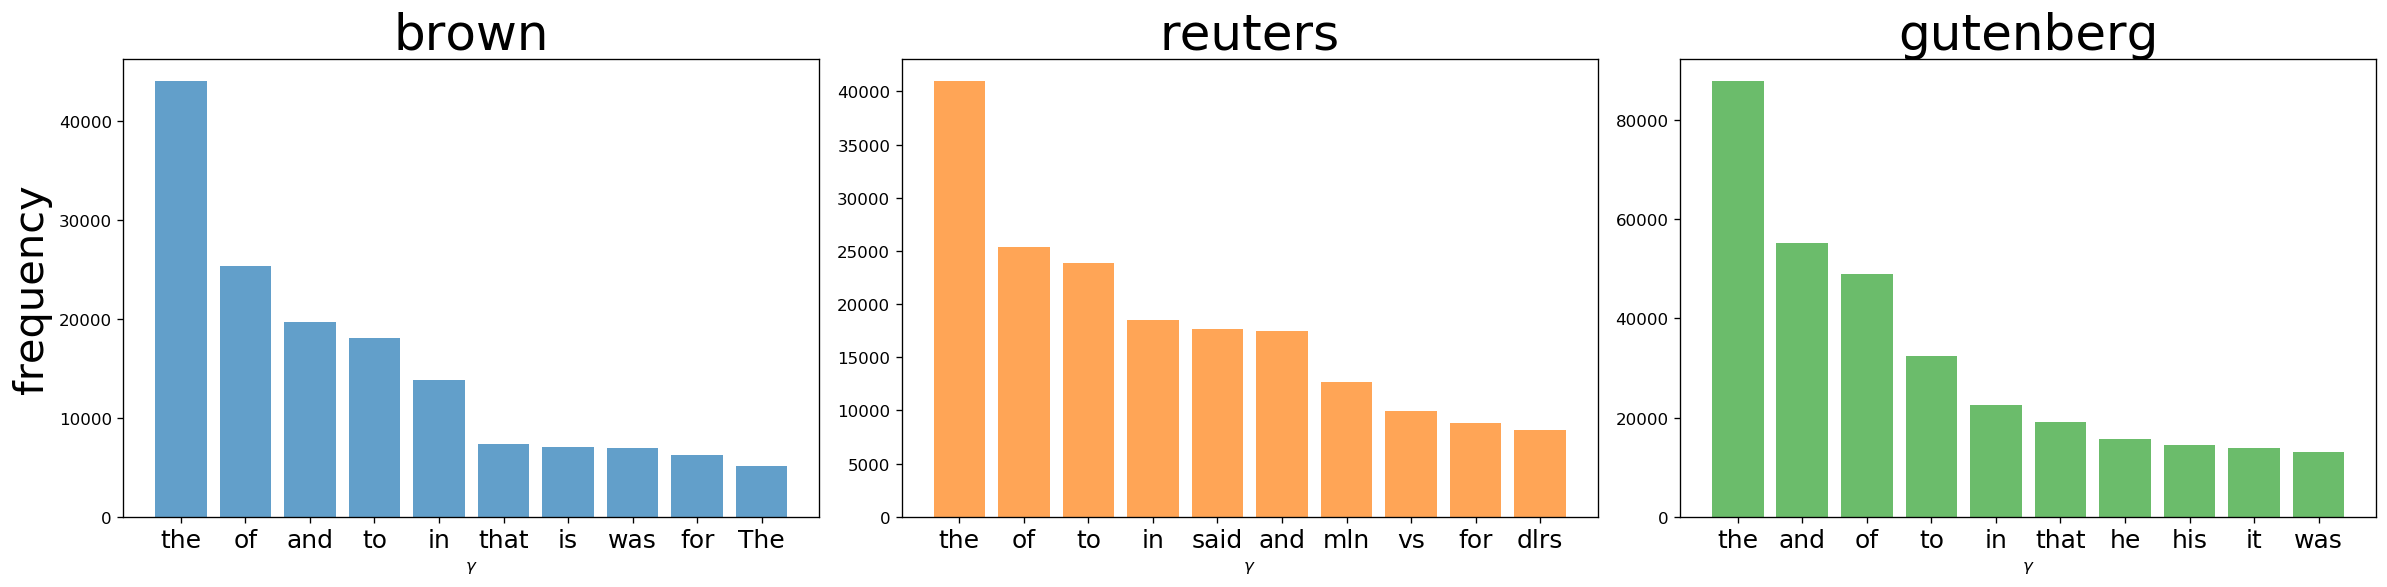

In [139]:
with open('word_count.pkl', 'rb') as f:
    word_count = pickle.load(f)
    
print(word_count.keys())
for domain in word_count.keys():
    del word_count[domain]['END_OF_SENTENCE']
# print(word_count['brown']['END_OF_SENTENCE'])

domain_list = ['brown', 'reuters', 'gutenberg']

words = {'brown': [], 'reuters': [], 'gutenberg': []}
words_freq = {'brown': [], 'reuters': [], 'gutenberg': []}

for domain in domain_list:
    print(domain)
    for i in range(10):
        maximum = max(word_count[domain], key=word_count[domain].get)
        if maximum == 'START_OF_SENTENCE':
            words[domain].append('SOS')
        elif maximum ==  'END_OF_SENTENCE':
            words[domain].append('EOS')
        else:
            words[domain].append(maximum)
        words_freq[domain].append(word_count[domain][maximum])

        del word_count[domain][maximum]
# print(words)
# print(words_freq)

color_list = ['tab:blue', 'tab:orange', 'tab:green']
fig, axs = plt.subplots(1,3, dpi=120, figsize=(20,5))

for i, domain in enumerate(domain_list):
    axs[i].bar(range(len(words_freq[domain])), words_freq[domain], color=color_list[i], alpha=0.7, fill=True)

    axs[i].set_title(domain, fontsize=30)
    axs[i].set_xticks(range(10))
    axs[i].set_xticklabels(words[domain], fontsize=15)
    axs[i].set_xlabel("$\gamma$")
    if i == 0:
        axs[i].set_ylabel("frequency", fontsize=25)
plt.tight_layout()
plt.show()
fig.savefig('word_count.png')